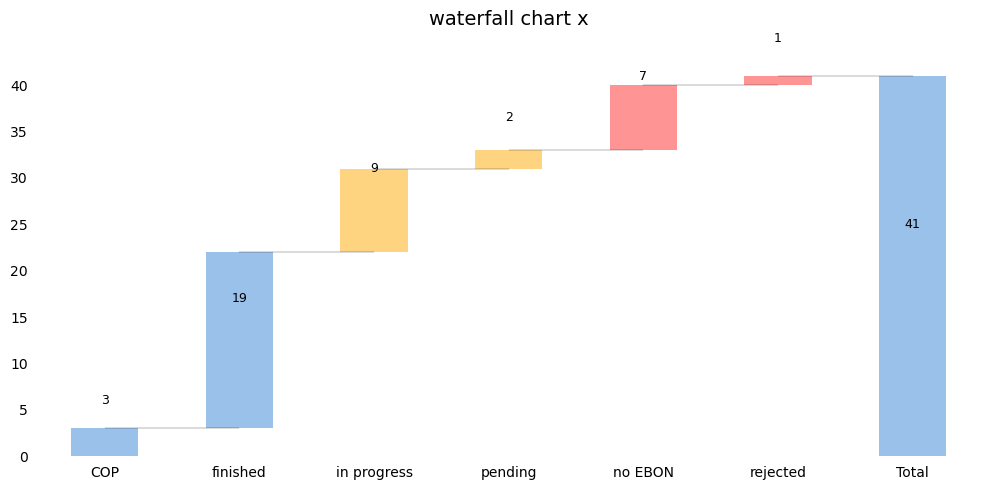

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
# python-waterfall-chart
# by caijunling@csvw.com
# Define colors for the bars
COLORS = ['#9AC1E9', '#9AC1E9', '#FFD480', '#FFD480', '#FF9494', '#FF9494']

# Create the initial DataFrame
def create_dataframe():
    categories = ['COP', 'finished', 'in progress', 'pending', 'no EBON', 'rejected']
    data = {'amount': [3, 19, 9, 2, 7, 1]}
    category_order = ['COP', 'finished', 'in progress', 'pending', 'no EBON', 'rejected']
    df = pd.DataFrame(data=data, index=categories)
    df = df.reindex(category_order)
    return df

# Configure plot settings
def configure_plot():
    rcParams['axes.titlepad'] = 30
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    ax.set_xticks([])
    title_font = {'fontsize': 14, 'fontfamily': 'DIN'}
    ax.set_title("waterfall chart x", fontdict=title_font)
    return ax

# Calculate cumulative totals
def calculate_totals(df):
    cumulative_sum = df.amount.cumsum().shift(1).fillna(0)
    total_amount = df.sum().amount
    df.loc["Total"] = total_amount
    cumulative_sum.loc["Total"] = total_amount
    return cumulative_sum, total_amount

# Plot the bar chart
def plot_bar_chart(df, cumulative_sum, total_amount):
    ax = configure_plot()
    
    step = cumulative_sum.reset_index(drop=True).repeat(3).shift(-1)
    step[1::3] = np.nan
    cumulative_sum.loc["Total"] = 0
    
    my_plot = df.plot(
        kind='bar',
        stacked=True,
        bottom=cumulative_sum,
        legend=None,
        ax=ax,
        width=0.5,
        linewidth=2,
    )

    my_plot.plot(step.index, step.values, 'k', linewidth=0.2)

    y_height = df.amount.cumsum().shift(1).fillna(0)
    max_val = df.max()
    plot_offset = int(max_val / 15)
    my_plot.set_ylim(0, cumulative_sum.max() + plot_offset)
    
    for i, bar in enumerate(my_plot.patches):
        bar.set_facecolor(COLORS[i % len(COLORS)])
    
    my_plot.set_xticklabels(df.index, rotation=0)
    my_plot.bar_label(my_plot.containers[0], label_type='center', color='black', fontsize=9, padding=30)
    plt.tight_layout()

def main():
    df = create_dataframe()
    cumulative_sum, total_amount = calculate_totals(df)
    plot_bar_chart(df, cumulative_sum, total_amount)

if __name__ == "__main__":
    main()
